In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import PlaintextCorpusReader
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\icono\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\icono\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\icono\AppData\Roaming\nltk_data...


True

## TASKS

###   2.1 Corpus Creation

In [78]:
# We create a NLTK corpus from this text file
corpus = PlaintextCorpusReader('.', 'toyStory1.csv')

##### Tokenization

In [79]:
#Applying tokenization
raw_text = corpus.raw()
tokens = nltk.word_tokenize(raw_text)
print(tokens[:50])

['1', 'Transcript', ':', '1.1', '01', 'Sheriff', 'Woody', '1.2', '02', 'Opening', 'Credits', '(', '``', "''", 'You', "'ve", 'Got', 'a', 'Friend', 'in', 'Me', "''", "''", ')', '1.3', '03', 'The', 'Coast', 'Is', 'Clear', '1.4', '04', 'The', 'Staff', 'Meeting', '1.5', '05', 'Recon', 'Plan', 'Charlie', '1.6', '06', 'Buzz', 'Lightyear', ',', 'Space', 'Ranger', '1.7', '07', '``']


In [80]:
#Applying sentence tokenization
sentences = sent_tokenize(raw_text)
print(sentences[:10])

['\n\n1 Transcript:\n\n1.1 01 Sheriff Woody\n1.2 02 Opening Credits (""You\'ve Got a Friend in Me"")\n1.3 03 The Coast Is Clear\n1.4 04 The Staff Meeting\n1.5 05 Recon Plan Charlie\n1.6 06 Buzz Lightyear, Space Ranger\n1.7 07 ""Strange Things""\n1.8 08 Woody Vs. Buzz\n1.9 09 Sid\n1.10 10 Who Will Andy Pick?', '1.11 11 Buzz Hitches a Ride\n1.12 12 Lost at the Gas Station\n1.13 13 Pizza Planet\n1.14 14 Sid\'s House\n1.15 15 Back at Andy\'s\n1.16 16 Playtime with Sid\n1.17 17 The Buzz Lightyear Commercial\n1.18 18 ""I Will Go Sailing No More""\n1.19 19 Hannah\'s Tea Party\n1.20 20 Sid\'s Window to Andy\'s Window\n1.21 21 The Big One\n1.22 22 Andy Misses Woody\n1.23 23 ""Buzz, I Can\'t Do This Without You""\n1.24 24 Woody Asks for Help\n1.25 25 ""Wind the Frog""\n1.26 26 ""Play Nice!""', "1.27 27 The Chase\n1.28 28 Rocket Power\n1.29 29 Christmas in Andy's New House\n\n\n\n\n\nTranscript:[]\n01 Sheriff Woody[]\n[The Walt Disney Pictures logo plays, except the castle is in CGI, while the ca

---

#### Lemmatization

In [81]:
# Filter out stopwords
stop_words = set(stopwords.words("english"))
filtered_tokens = [word for word in tokens if word.isalpha() and word.lower() not in stop_words]

# Lemmatize the words
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

# Create a frequency distribution of words
fdist = FreqDist(lemmatized_tokens)

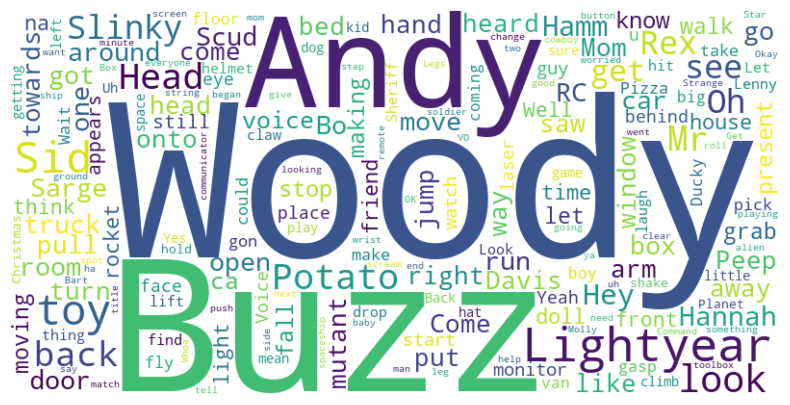

In [82]:

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color="white").generate_from_frequencies(fdist)
# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

---

#### Word Frequency

Woody: 678 times
Buzz: 508 times
Andy: 197 times
Lightyear: 180 times
Sid: 153 times
toy: 143 times
look: 109 times
Potato: 96 times
Head: 96 times
back: 89 times


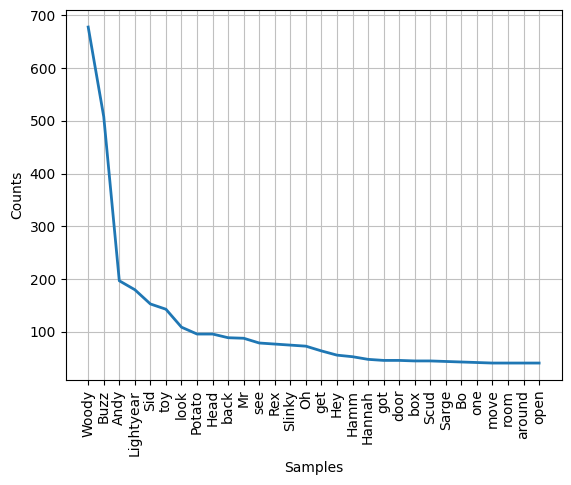

In [83]:
# Print the most common words and their frequencies
most_common = fdist.most_common(10)
for word, freq in most_common:
    print(f"{word}: {freq} times")

# Plot a frequency distribution graph
fdist.plot(30, cumulative=False)
plt.show()